# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 180MB/s]


## Importing Libraries

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
# Load the dataset
data = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

# Display the first few rows
data.head()


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [6]:
data.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [7]:
data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


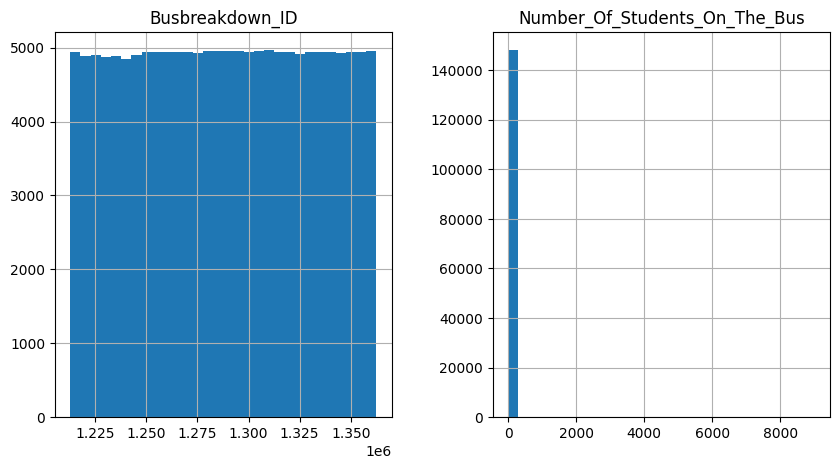

In [13]:
# Distribution of numerical features
data.hist(bins=30, figsize=(10, 5))
plt.show()

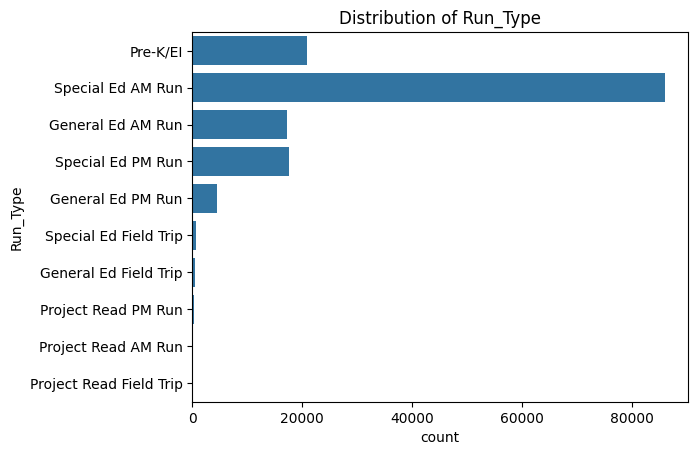

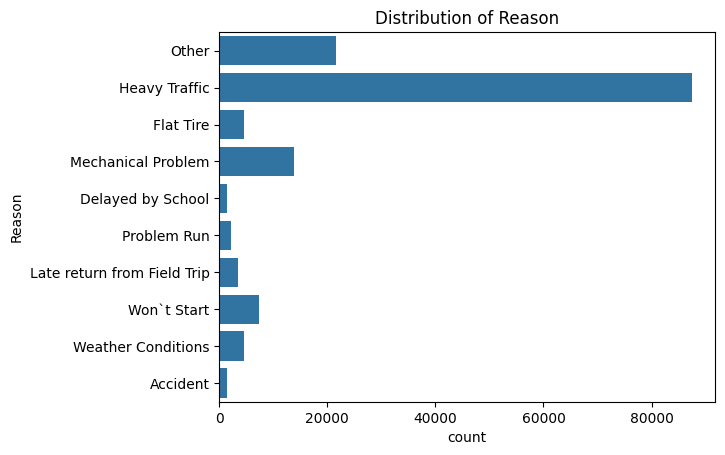

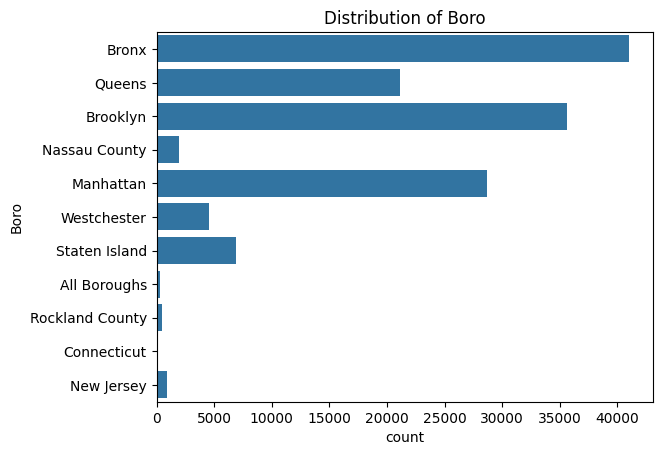

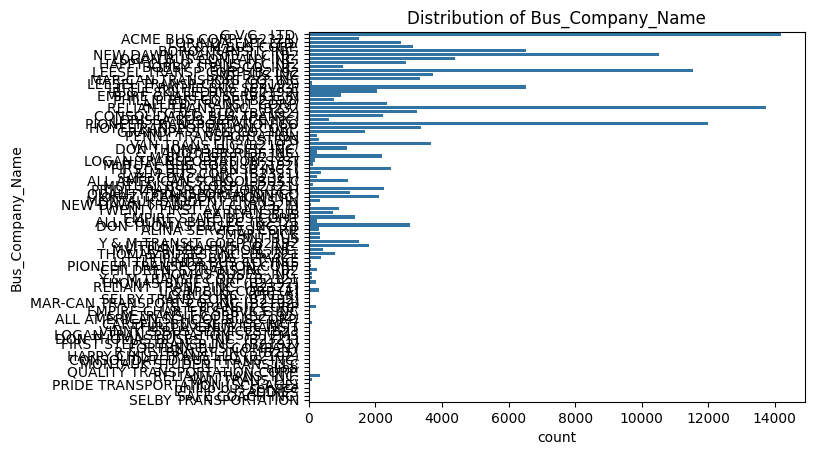

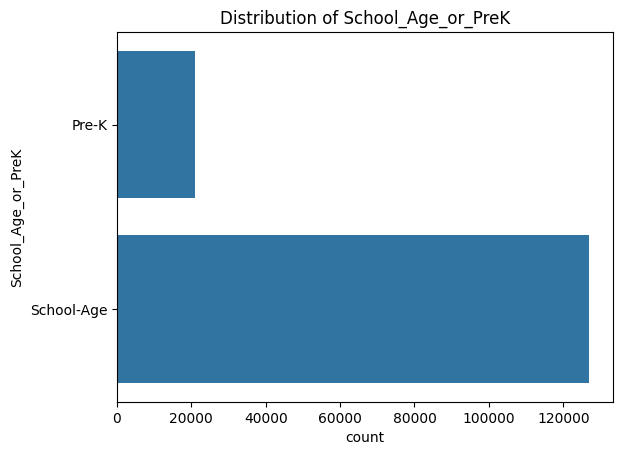

In [14]:
# Distribution of categorical features
categorical_features = ['Run_Type', 'Reason', 'Boro', 'Bus_Company_Name', 'School_Age_or_PreK']
for feature in categorical_features:
    sns.countplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

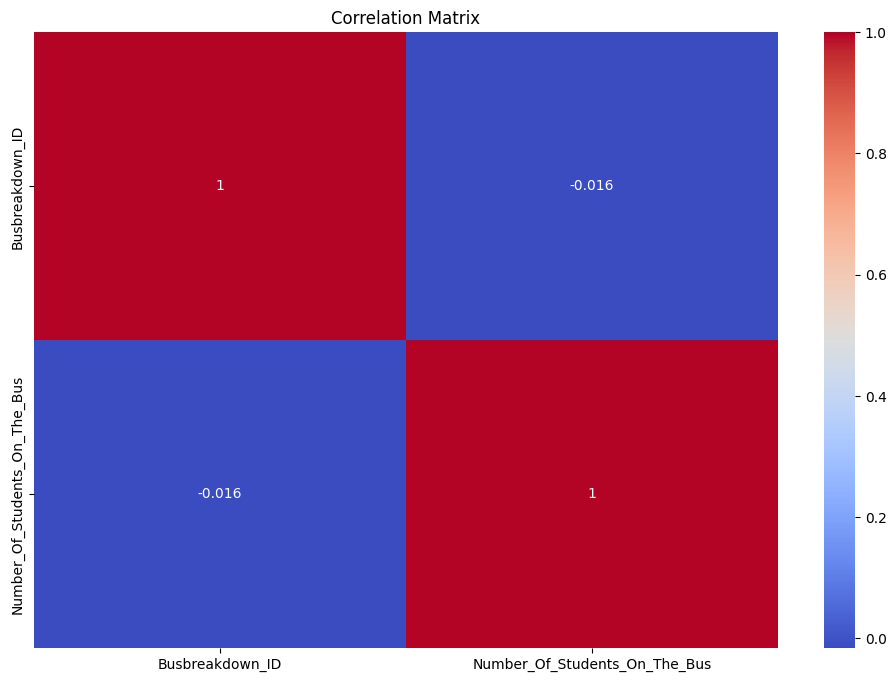

In [17]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

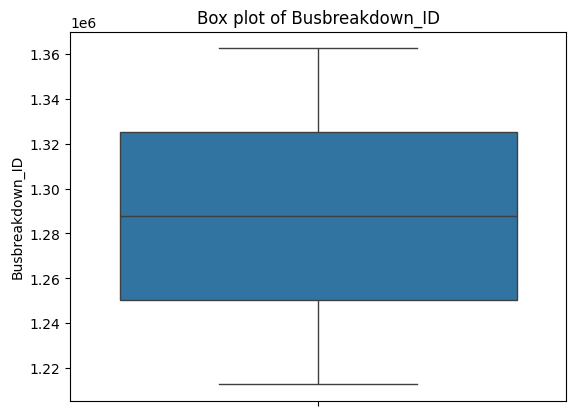

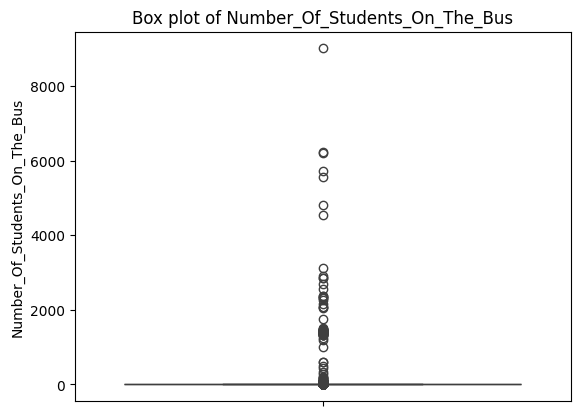

In [16]:
# Box plots for outlier detection
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [18]:
# Remove outliers
Q1 = data['Number_Of_Students_On_The_Bus'].quantile(0.25)
Q3 = data['Number_Of_Students_On_The_Bus'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Number_Of_Students_On_The_Bus'] >= lower_bound) & (data['Number_Of_Students_On_The_Bus'] <= upper_bound)]

In [46]:
data.duplicated().sum()

0

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [20]:
# Fill missing values with the mode for categorical columns
data['Run_Type'].fillna(data['Run_Type'].mode()[0], inplace=True)
data['Route_Number'].fillna(data['Route_Number'].mode()[0], inplace=True)
data['Reason'].fillna(data['Reason'].mode()[0], inplace=True)
data['Boro'].fillna(data['Boro'].mode()[0], inplace=True)

<ipython-input-20-bd1b0b937b8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Run_Type'].fillna(data['Run_Type'].mode()[0], inplace=True)
<ipython-input-20-bd1b0b937b8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Route_Number'].fillna(data['Route_Number'].mode()[0], inplace=True)
<ipython-input-20-bd1b0b937b8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reason'].fillna(data['Reason'].mode()[0], inplace=

In [21]:
data = data.dropna()

In [25]:
data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [26]:
data = pd.get_dummies(data, columns=['Run_Type', 'Reason', 'Boro', 'Bus_Company_Name', 'School_Age_or_PreK'])

In [28]:
print(data.columns)

Index(['School_Year', 'Busbreakdown_ID', 'Bus_No', 'Route_Number',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'How_Long_Delayed',
       'Number_Of_Students_On_The_Bus', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Informed_On', 'Incident_Number', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'Run_Type_General Ed AM Run',
       'Run_Type_General Ed Field Trip', 'Run_Type_General Ed PM Run',
       'Run_Type_Project Read AM Run', 'Run_Type_Project Read PM Run',
       'Run_Type_Special Ed AM Run', 'Run_Type_Special Ed Field Trip',
       'Run_Type_Special Ed PM Run', 'Reason_Accident',
       'Reason_Delayed by School', 'Reason_Flat Tire', 'Reason_Heavy Traffic',
       'Reason_Late return from Field Trip', 'Reason_Mechanical Problem',
       'Reason_Other', 'Reason_Problem Run', 'Reason_Weather Conditions',
       'Reason_Won`t Start', 'Boro_All Boroughs', 'Boro_Bronx',
       'Boro_Brooklyn', 'Boro_

In [29]:
data.columns = data.columns.str.strip()

In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the data, excluding the target column 'Breakdown_or_Running_Late'
data_scaled = scaler.fit_transform(data.drop(columns=['Breakdown_or_Running_Late']))

# Convert back to DataFrame for convenience
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])

# Add the 'Breakdown_or_Running_Late' column back to the scaled DataFrame
data_scaled['Breakdown_or_Running_Late'] = data['Breakdown_or_Running_Late']

In [39]:
# Check for missing values in the target column
missing_y = y.isnull().sum()
print(f"Missing values in 'Breakdown_or_Running_Late': {missing_y}")

Missing values in 'Breakdown_or_Running_Late': 4956


In [40]:
# Drop rows where the target variable is NaN
data_scaled = data_scaled.dropna(subset=['Breakdown_or_Running_Late'])

# Update X and y after dropping missing values
X = data_scaled.drop('Breakdown_or_Running_Late', axis=1)
y = data_scaled['Breakdown_or_Running_Late']

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

# Split the data into features (X) and target (y)
X = data_scaled.drop('Breakdown_or_Running_Late', axis=1)
y = data_scaled['Breakdown_or_Running_Late']

# Initialize SelectKBest with f_classif and select the top 20 features
selector = SelectKBest(f_classif, k=20)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Convert the selected features back into a DataFrame
data_selected = pd.DataFrame(X_selected, columns=selected_features)

# Add the target column back to the selected data
data_selected['Breakdown_or_Running_Late'] = y.values

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.drop(columns=['Breakdown_or_Running_Late']))

# Convert back to DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=data.columns[:-1])
data_standardized['Breakdown_or_Running_Late'] = data['Breakdown_or_Running_Late']

In [45]:
#Feature Engineering
data['Occurred_Year'] = pd.to_datetime(data['Occurred_On']).dt.year
data['Occurred_Month'] = pd.to_datetime(data['Occurred_On']).dt.month

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop('Breakdown_or_Running_Late', axis=1)
y = data['Breakdown_or_Running_Late']

selector = SelectKBest(f_classif, k=20)  # Select the top 20 features
X_selected = selector.fit_transform(X, y)

# Convert to DataFrame
selected_features = X.columns[selector.get_support()]
data_selected = pd.DataFrame(X_selected, columns=selected_features)
data_selected['Breakdown_or_Running_Late'] = y


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [86 87 88] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [52]:
print(y.value_counts())
print(y_resampled.value_counts())

Breakdown_or_Running_Late
1    4960
0       2
Name: count, dtype: int64
Breakdown_or_Running_Late
0    2
1    2
Name: count, dtype: int64


In [49]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_selected, y)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [54]:
# Assuming X_resampled and y_resampled are your resampled feature and target variables
X = pd.DataFrame(X_resampled)
y = pd.Series(y_resampled)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [60]:
y = y.astype(int)

In [61]:
print(y.value_counts())

Breakdown_or_Running_Late
0    2
1    2
Name: count, dtype: int64


In [68]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [69]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 28358.8398 - val_accuracy: 0.0000e+00 - val_loss: 27741.5332
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5000 - loss: 27022.0156 - val_accuracy: 0.0000e+00 - val_loss: 22334.8105
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 35109.1172 - val_accuracy: 0.0000e+00 - val_loss: 17970.2305
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 14419.4492
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 11435.3135
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.0000e+00 - loss: 81468.3750 - val_accuracy: 0.0000e+00 - val_loss: 9818.4551
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.0000e+00 - loss: 12503.9688 - val_accuracy: 0.0000e+00 - val_loss: 8424.0264
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━

In [75]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Adjust learning rate
optimizer = Adam(learning_rate=0.001)

# Define your model architecture with dropout layers
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6931


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [76]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.6931
Test Loss: 0.6931471824645996
Test Accuracy: 1.0


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [86]:
for col in data.columns:
  if data[col].nunique() == 1:
    print(col)


School_Age_or_PreK_School-Age
Occurred_Year
Occurred_Month


In [88]:
new_data = np.random.rand(80, X_train.shape[1])  # 80 samples with same number of features as training data

# Make predictions
predictions = model.predict(new_data)

binary_predictions = (predictions > 0.5).astype(int)

print("Probabilistic Predictions:\n", predictions)
print("\nBinary Predictions:\n", binary_predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Probabilistic Predictions:
 [[0.48000196]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.48138005]
 [0.5       ]
 [0.48387793]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.46581167]
 [0.5       ]
 [0.5       ]
 [0.48048082]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.4554792 ]
 [0.47780555]
 [0.5       ]
 [0.4764127 ]
 [0.5       ]
 [0.4922325 ]
 [0.5       ]
 [0.5       ]
 [0.48931327]
 [0.5       ]
 [0.5       ]
 [0.49211624]
 [0.48271164]
 [0.5       ]
 [0.5       ]
 [0.48798072]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.4927039 ]
 [0.5       ]
 [0.4937515 ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.48752174]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.4881626 ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.5       ]
 [0.4790035 ]
 [0.5       ]
 [0.5       ]
 [0.4978406 ]
 [0.5       ]
 [0.5     

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [89]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

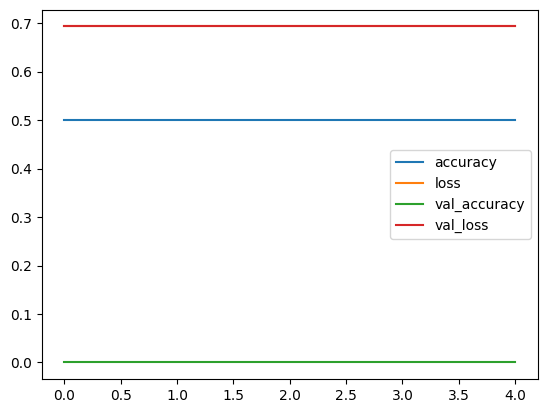

In [91]:
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model? encodeing to Converts categories into numerical format.normalization Ensures all features are on a similar scale.

Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand? it's not good well but I dont' enough time to enhance.

Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes? when treain more eopch it is take longtime and more error acc.

Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?

Regularization Techniques: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance. just early stopping to stop and pervent overfitting